In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

In [2]:
ldap_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\LDAP_resample_4000.csv')
ldap_df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.045263,-0.015250,-0.005277,-0.005954,0.289320,-0.002643,0.322770,0.323287,0.323284,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.00637,-0.013105,-0.005207,-0.013185,-0.012838,-1
1,0.045263,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.00637,-0.013105,-0.005207,-0.013185,-0.012838,-1
2,0.045263,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.00637,-0.013105,-0.005207,-0.013185,-0.012838,-1
3,0.045263,-0.015249,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.00637,-0.013105,-0.005207,-0.013185,-0.012838,-1
4,0.045263,-0.015250,-0.005277,-0.005954,0.289320,-0.002643,0.322770,0.323287,0.323284,-0.016174,...,0.226646,-0.007737,-0.005256,-0.007436,-0.00637,-0.013105,-0.005207,-0.013185,-0.012838,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,0.045263,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.00637,-0.013105,-0.005207,-0.013185,-0.012838,-1
3721,0.045263,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.00637,-0.013105,-0.005207,-0.013185,-0.012838,-1
3722,0.045263,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.00637,-0.013105,-0.005207,-0.013185,-0.012838,-1
3723,0.045263,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,...,0.226640,-0.007737,-0.005256,-0.007436,-0.00637,-0.013105,-0.005207,-0.013185,-0.012838,-1


In [3]:
benign_test_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Benign_resample_4000.csv')

In [4]:
# novelty detection
df = pd.concat([benign_test_df, ldap_df], ignore_index=True)

In [5]:
clean_dataset = df.drop([" Protocol", ' Label'], axis=1)

In [6]:
tres = 0.1

lowvariancefilter = VarianceThreshold(threshold=tres)
lowvariancefilter.fit_transform(clean_dataset)

filtered_cols = clean_dataset.drop(
    columns=clean_dataset.columns[lowvariancefilter.get_support()].array
).columns.array

lowvariance_dataset = clean_dataset.drop(columns=filtered_cols)
lowvariance_dataset

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.343690,-0.086569,0.096351,0.142000,0.002723,0.706619,1.982467,1.798333,-0.034669,0.643201,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
1,5.598377,2.253048,4.681794,3.829148,0.125465,3.569438,-0.039001,2.481753,5.125594,0.931779,...,6.200510,-0.059807,1.103561,0.162506,0.515708,1.673959,6.184780,12.942534,8.511326,2.479016
2,-0.344938,-0.176134,0.096351,-0.053129,-0.005474,-0.046063,-0.039001,-0.049093,-0.034669,0.003313,...,-0.472948,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
3,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
4,-0.343689,-0.086569,0.096351,0.147135,0.002883,0.728125,2.040223,1.851116,-0.034669,0.655748,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,-0.017354,...,-0.006399,0.226640,-0.007737,-0.005256,-0.007436,-0.006370,-0.013105,-0.005207,-0.013185,-0.012838
7724,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,-0.017354,...,-0.006399,0.226640,-0.007737,-0.005256,-0.007436,-0.006370,-0.013105,-0.005207,-0.013185,-0.012838
7725,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,-0.017354,...,-0.006399,0.226640,-0.007737,-0.005256,-0.007436,-0.006370,-0.013105,-0.005207,-0.013185,-0.012838
7726,-0.015250,-0.005277,-0.005954,0.309328,-0.002643,0.344531,0.345012,0.345025,-0.016174,-0.017354,...,-0.006399,0.226640,-0.007737,-0.005256,-0.007436,-0.006370,-0.013105,-0.005207,-0.013185,-0.012838


In [7]:
lowvariance_dataset["Label"] = df[" Label"].astype('category').cat.codes
lowvariance_dataset["Label"]

0       1
1       1
2       1
3       1
4       1
       ..
7723    0
7724    0
7725    0
7726    0
7727    0
Name: Label, Length: 7728, dtype: int8

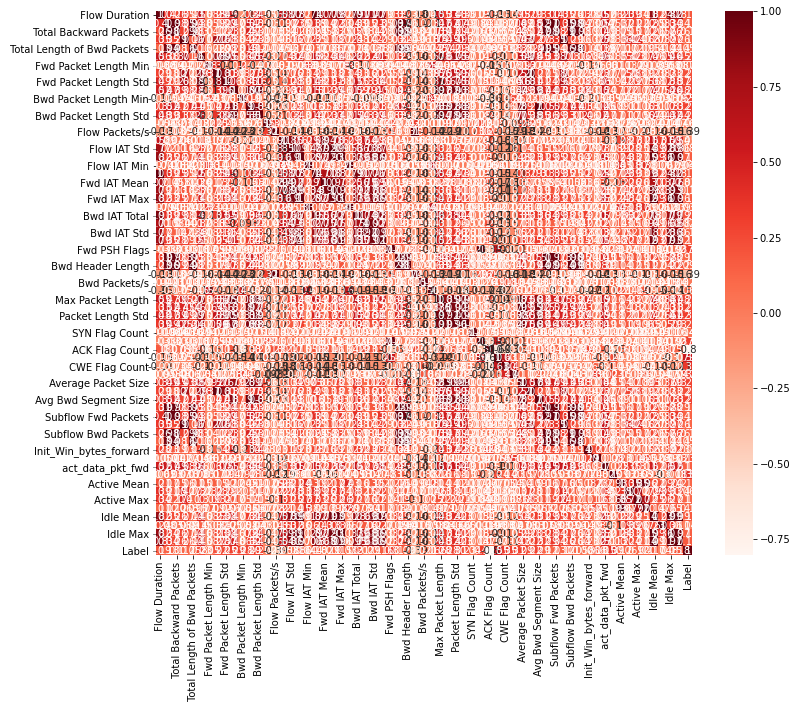

In [9]:
plt.figure(figsize=(12,10))
cor = lowvariance_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
cor_target = abs(cor["Label"])
cor_target

 Flow Duration                  0.186272
 Total Fwd Packets              0.134662
 Total Backward Packets         0.103909
Total Length of Fwd Packets     0.118830
 Total Length of Bwd Packets    0.058021
                                  ...   
Idle Mean                       0.170547
 Idle Std                       0.047858
 Idle Max                       0.153492
 Idle Min                       0.182619
Label                           1.000000
Name: Label, Length: 65, dtype: float64

In [18]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

 Fwd Packet Length Max     0.233644
 Fwd Packet Length Mean    0.223282
 Fwd Packet Length Std     0.249494
Bwd Packet Length Max      0.288082
 Bwd Packet Length Min     0.282664
 Bwd Packet Length Mean    0.287704
 Bwd Packet Length Std     0.269635
 Flow Packets/s            0.389591
Bwd IAT Total              0.213173
Fwd PSH Flags              0.303082
Fwd Packets/s              0.392346
 Max Packet Length         0.282362
 Packet Length Mean        0.283390
 Packet Length Std         0.312548
 Packet Length Variance    0.231874
 RST Flag Count            0.303082
 ACK Flag Count            0.801117
 URG Flag Count            0.551756
 CWE Flag Count            0.347647
 Down/Up Ratio             0.308156
 Average Packet Size       0.286669
 Avg Fwd Segment Size      0.223282
 Avg Bwd Segment Size      0.287704
 min_seg_size_forward      0.393422
Label                      1.000000
Name: Label, dtype: float64